2001-01-01
2001-02-01
2001-03-01
2001-04-01
2001-05-01
2001-06-01
2001-07-01
2001-08-01
2001-09-01
2001-10-01
2001-11-01
2001-12-01
2002-01-01
2002-02-01
2002-03-01
2002-04-01
2002-05-01
2002-06-01
2002-07-01
2002-08-01
2002-09-01
2002-10-01
2002-11-01
2002-12-01
2003-01-01
2003-02-01
2003-03-01
2003-04-01
2003-05-01
2003-06-01
2003-07-01
2003-08-01
2003-09-01
2003-10-01
2003-11-01
2003-12-01
2004-01-01
2004-02-01
2004-03-01
2004-04-01
2004-05-01
2004-06-01
2004-07-01
2004-08-01
2004-09-01
2004-10-01
2004-11-01
2004-12-01
2005-01-01
2005-02-01
2005-03-01
2005-04-01
2005-05-01
2005-06-01
2005-07-01
2005-08-01
2005-09-01
2005-10-01
2005-11-01
2005-12-01
2006-01-01
2006-02-01
2006-03-01
2006-04-01
2006-05-01
2006-06-01
2006-07-01
2006-08-01
2006-09-01
2006-10-01
2006-11-01
2006-12-01
2007-01-01
2007-02-01
2007-03-01
2007-04-01
2007-05-01
2007-06-01
2007-07-01
2007-08-01
2007-09-01
2007-10-01
2007-11-01
2007-12-01
2008-01-01
2008-02-01
2008-03-01
2008-04-01
2008-05-01
2008-06-01
2008-07-01

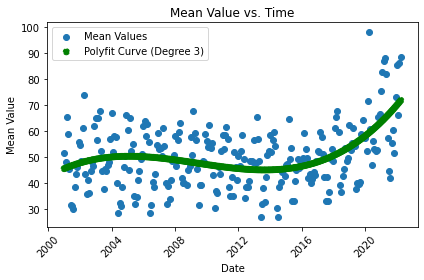

In [33]:
import os
import re
import datetime
import numpy as np
import matplotlib.pyplot as plt
from rasterio import open as raster_open
import matplotlib.dates as mdates
from datetime import datetime


# Function to extract date from filename
def extract_date(filename):
    match = re.search(r'\d{4}\.\d{2}\.\d{2}', filename)
    if match:
        return datetime.strptime(match.group(), '%Y.%m.%d').date()
    else:
        return None

# Folder containing TIF files
folder_path = r'/efs/Incomati/Precipitation/Arc/Monthly'

# Lists to store dates and mean values
dates = []
mean_values = []

# start_date = datetime(2001, 1, 1)
# end_date = datetime(2001, 12, 1)

tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
tif_files = sorted(tif_files, key=lambda x: datetime.strptime(re.search(r'(\d{4}\.\d{2}\.\d{2})', x.split('_')[2] ).group(1), "%Y.%m.%d"))

# Loop through TIF files in the folder
for filename in tif_files:
    if filename.endswith(".tif"):
        # Extract date from filename
        date = extract_date(filename)
        print(date)
        
        if date:
            # Read TIF file and calculate mean value
            tif_path = os.path.join(folder_path, filename)
            with raster_open(tif_path) as src:
                data = src.read(1)  # Assuming a single band TIF
                mean_value = np.mean(data)
                
            # Append date and mean value to lists
            dates.append(date)
            mean_values.append(mean_value)

# Convert dates to numeric format for polyfit
numeric_dates = [mdates.date2num(date) for date in dates]

# Fit a polynomial curve (adjust the degree as needed)
degree = 3  # You can adjust the degree based on your data
coefficients = np.polyfit(numeric_dates, mean_values, degree)
poly_curve = np.poly1d(coefficients)

# Plotting
plt.scatter(dates, mean_values, marker='o', label='Mean Values')
plt.scatter(dates, poly_curve(numeric_dates), color ='green', label=f'Polyfit Curve (Degree {degree})', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Mean Value vs. Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


2001-01-01
2001-02-01
2001-03-01
2001-04-01
2001-05-01
2001-06-01
2001-07-01
2001-08-01
2001-09-01
2001-10-01
2001-11-01
2001-12-01
2002-01-01
2002-02-01
2002-03-01
2002-04-01
2002-05-01
2002-06-01
2002-07-01
2002-08-01
2002-09-01
2002-10-01
2002-11-01
2002-12-01
2003-01-01
2003-02-01
2003-03-01
2003-04-01
2003-05-01
2003-06-01
2003-07-01
2003-08-01
2003-09-01
2003-10-01
2003-11-01
2003-12-01
2004-01-01
2004-02-01
2004-03-01
2004-04-01
2004-05-01
2004-06-01
2004-07-01
2004-08-01
2004-09-01
2004-10-01
2004-11-01
2004-12-01
2005-01-01
2005-02-01
2005-03-01
2005-04-01
2005-05-01
2005-06-01
2005-07-01
2005-08-01
2005-09-01
2005-10-01
2005-11-01
2005-12-01
2006-01-01
2006-02-01
2006-03-01
2006-04-01
2006-05-01
2006-06-01
2006-07-01
2006-08-01
2006-09-01
2006-10-01
2006-11-01
2006-12-01
2007-01-01
2007-02-01
2007-03-01
2007-04-01
2007-05-01
2007-06-01
2007-07-01
2007-08-01
2007-09-01
2007-10-01
2007-11-01
2007-12-01
2008-01-01
2008-02-01
2008-03-01
2008-04-01
2008-05-01
2008-06-01
2008-07-01

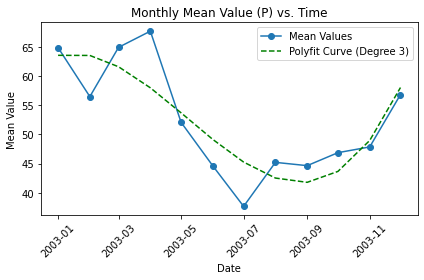

In [50]:
import os
import re
import datetime
import numpy as np
import matplotlib.pyplot as plt
from rasterio import open as raster_open
import matplotlib.dates as mdates

# Function to extract date from filename
def extract_date(filename):
    match = re.search(r'\d{4}\.\d{2}\.\d{2}', filename)
    if match:
        return datetime.datetime.strptime(match.group(), '%Y.%m.%d').date()
    else:
        return None

# Folder containing TIF files
folder_path = r'/efs/Incomati/Precipitation/Arc/Monthly'

# Lists to store dates and mean values
dates = []
mean_values = []

# Specify the start and end dates for the desired time range
start_date = datetime.datetime(2003, 1, 1).date()
end_date = datetime.datetime(2003, 12, 1).date()

tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
tif_files = sorted(tif_files, key=lambda x: datetime.datetime.strptime(re.search(r'(\d{4}\.\d{2}\.\d{2})', x.split('_')[2]).group(1), "%Y.%m.%d"))

# Loop through TIF files in the folder
for filename in tif_files:
    if filename.endswith(".tif"):
        # Extract date from filename
        date = extract_date(filename)
        print(date)

        if start_date <= date <= end_date:
            # Read TIF file and calculate mean value
            tif_path = os.path.join(folder_path, filename)
            with raster_open(tif_path) as src:
                data = src.read(1)  # Assuming a single band TIF
                mean_value = np.mean(data)

            # Append date and mean value to lists
            dates.append(date)
            mean_values.append(mean_value)
        else:
            # If the date is outside the specified range, break out of the loop
            continue

# Convert dates to numeric format for polyfit
numeric_dates = [mdates.date2num(date) for date in dates]

# Fit a polynomial curve (adjust the degree as needed)
degree = 3  # You can adjust the degree based on your data
coefficients = np.polyfit(numeric_dates, mean_values, degree)
poly_curve = np.poly1d(coefficients)

# Plotting
plt.plot(dates, mean_values, marker='o', label='Mean Values')
plt.plot(dates, poly_curve(numeric_dates), color='green', label=f'Polyfit Curve (Degree {degree})', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Monthly Mean Value (P) vs. Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
